<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/HW4/SidPatel_GalRotHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [392]:
import pandas as pd
import numpy as np
import pylab as plt
%pylab inline


#package I will use for constants and units conversion 
import astropy
import matplotlib.lines as mlines
from fractions import Fraction



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

Newton's Law of Gravitation and Centripetal force.
$$
F = \frac{GMm}{r^2}
\, ,
F = \frac{mv^2}{r}
$$



$(1)\,$ Equate both equations.

$$
 \frac{mv^2}{r} = \frac{GMm}{r}
$$

$(2)\,$Cancel out $m$ and multiply both sides by $r$. 

$$
v^2 = \frac{GM}{r}
$$

$(3)\,$ Since G and M are constants, we can ignore them to derive the following proportionality:

$$
v^2 \propto \frac{1}{r}
$$


## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [393]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv",header=1)
m31 = m31[['#R(kpc', 'V(km/s)', 'St.dev.','St.error']].rename({'#R(kpc':"r", 'V(km/s)':"v", 'St.dev.':"dv",'St.error':"err"}, axis=1)

In [394]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [395]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [396]:
apparentSizeM31 = 3.167 * 1 #deg
distanceM31 = (765) #kpc 


In [397]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [398]:
dist31LYtoKPC = 2500000 * u.lyr
dist31LYtoKPC = dist31LYtoKPC.to(u.kpc)

Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


In [399]:
size31 = np.around(dist31LYtoKPC*np.sin(m31angS.to(u.rad)),3)
size31Approx = ((dist31LYtoKPC*(m31angS.to(u.rad)))/(u.rad))
print("size:", size31)
print("size approx:", size31Approx)
print("Size of the visible component of Andromeda...:", size31)
m31Rds = (size31 / u.kpc)/2
print("m31Rds =", m31Rds)

size: 42.347 kpc
size approx: 42.36815618753948 kpc
Size of the visible component of Andromeda...: 42.347 kpc
m31Rds = 21.1735


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

In [400]:
#m31

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [401]:
def getradii(gal, gsize, n):

  findSmalls = gal[gal.r >= (gsize*n)]
  galFiltered = findSmalls[findSmalls.r == findSmalls.r.min()]
  

  galRad = np.around(galFiltered["r"].values[0],2)
  galVel = np.around(galFiltered["v"].values[0],2)
  galErr = np.around(galFiltered["err"].values[0],2)
  galDv = np.around(galFiltered["dv"].values[0],2)

  return galRad, galVel, galErr, galDv
  ...

In [402]:
getradii(m31,size31,3)

(146.98, 177.52, 16.66, 81.76)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [403]:
galVel = getradii(m31,size31,3)
print(galVel)

(146.98, 177.52, 16.66, 81.76)


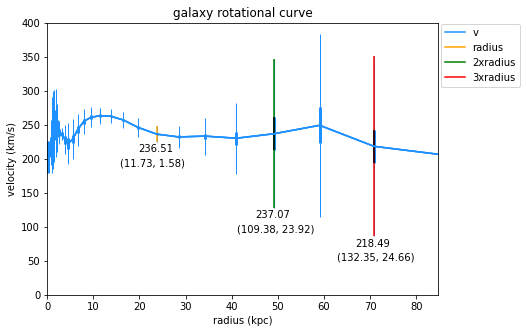

In [404]:
def plotGal(gal, rds):
  fig = plt.figure()
  fig.set_size_inches(7, 5)
  ax = fig.add_subplot(111)
  ax.set_xlabel('radius (kpc)', fontsize = 10)
  ax.set_ylabel('velocity (km/s)', fontsize = 10)

  N1 = getradii(gal,rds,1)
  N2 = getradii(gal,rds,2)
  N3 = getradii(gal,rds,3)

  ax.set_xlim([0, rds*4])
  ax.set_ylim([0,400])
  
  ax.plot(gal.r,gal.v,color='dodgerblue')
  vel = ax.errorbar(gal.r,gal.v,yerr=gal.err,color = 'dodgerblue',elinewidth = 3)
  ax.errorbar(gal.r,gal.v,yerr=gal.dv,color = 'dodgerblue',elinewidth = 1)

  rad1 = ax.errorbar(N1[0],N1[1],yerr=N1[3], color = 'orange')
  ax.errorbar(N1[0],N1[1],yerr=N1[2], color = 'black')
  ax.text(N1[0]-4,N1[1]-N1[3]-15,str(N1[1]))
  ax.text(N1[0]-8,N1[1]-N1[3]-35,"("+str(N1[3])+", "+str(N1[2])+")")
  

  rad2 = ax.errorbar(N2[0],N2[1],yerr=N2[3], color = 'green')
  ax.errorbar(N2[0],N2[1],yerr=N2[2], color = 'black')
  ax.text(N2[0]-4,N2[1]-N2[3]-15,str(N2[1]))
  ax.text(N2[0]-8,N2[1]-N2[3]-35,"("+str(N2[3])+", "+str(N2[2])+")")



  rad3 = ax.errorbar(N3[0],N3[1],yerr=N3[3], color = 'red')
  ax.errorbar(N3[0],N3[1],yerr=N3[2], color = 'black')
  ax.text(N3[0]-4,N3[1]-N3[3]-15,str(N3[1]))
  ax.text(N3[0]-8,N3[1]-N3[3]-35,"("+str(N3[3])+", "+str(N3[2])+")")





  blue_line = mlines.Line2D([],[],color='dodgerblue', label='v')
  orange_line = mlines.Line2D([],[],color='orange', label='radius')
  green_line = mlines.Line2D([],[],color='green', label='2xradius')
  red_line = mlines.Line2D([],[],color='red', label='3xradius')

  ax.legend(handles=[blue_line,orange_line,green_line,red_line],bbox_to_anchor=(1.223, 1.016))
  
  ax.set_title("galaxy rotational curve")

plotGal(m31, m31Rds)

Caption:
This plot is a galactic rotation curve for M31. It has it's velocities plotted against the radius up til about three times the radius of M31. As seen in the plot, this curve does not follow the $ v^2 \propto \frac{1}{r} $ proportion based on Newton's equation. 

Under the colored error bars with the corresponding radius, is the velocity at that radius and underneath that value is the uncertainty of velocity, (dv,err), the standard deviation (propagation of the uncertainty in the location of the HII line) and standard error (full error budget).

The thin error bars throughout are the standard deviation uncertainties and the thicker error bars are the standard error uncertainties.

 This data tells us that there is something affecting the galaxy to where the newtonian equations are not accurate. Since as the radius increases, the velocity does not decrease proportionally.

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [405]:
def vratios(gal, rds, N, err='dv'):
      
  galInfo = getradii(gal,rds,N)

  expDropV = np.around(1/galInfo[0],3)
  print("Expected drop in velocities ratio according to Newton's law:",str(1) + "/" + str(galInfo[0]),"=",expDropV )

  if err == 'dv':
    
    
    N1 = getradii(gal,rds,1)
    calcDropV = np.around(N1[1]/galInfo[1],3)
    DVcalcDropV = np.around(galInfo[3],3)
    sigLow = np.around(calcDropV - 2*DVcalcDropV,3)
    sigHigh = np.around(calcDropV + 2*DVcalcDropV,3)


    print("Calculated drop in velocities ratio with 'dv' uncertainty:"
    ,str(N1[1]) + "/" + str(galInfo[1]) + " = " +str(calcDropV) + " with an uncertainty of ± "+str(DVcalcDropV))

    print("2σ lower limit: ",sigLow)
    print("2σ upper limit: ",sigHigh)

    if (sigLow <= expDropV <= sigHigh):
      print("The expected ratio is within 2σ of the calculated ratio")

    else:
      print("The expected ratio is NOT within 2σ of the calculated ratio")  





  if err == 'err':
    N1 = getradii(gal,rds,1)
    calcDropV = np.around(N1[1]/galInfo[1],3)
    ERRcalcDropV = np.around(galInfo[2],3)
    sigLow = np.around(calcDropV - 2*ERRcalcDropV,3)
    sigHigh = np.around(calcDropV + 2*ERRcalcDropV,3)

    print("Calculated drop in velocities ratio with 'err' uncertainty:"
    ,str(N1[1]) + "/" + str(galInfo[1]) + " = " +str(calcDropV) + " with an uncertainty of ± "+str(ERRcalcDropV))

    print("2σ lower limit: ",sigLow)
    print("2σ upper limit: ",sigHigh)
    if (sigLow <= expDropV <= sigHigh):
      print("The expected ratio is within 2σ of the calculated ratio")

    else:
      print("The expected ratio is NOT within 2σ of the calculated ratio")  




In [406]:
vratios(m31,m31Rds,3,err='dv')

Expected drop in velocities ratio according to Newton's law: 1/70.88 = 0.014
Calculated drop in velocities ratio with 'dv' uncertainty: 236.51/218.49 = 1.082 with an uncertainty of ± 132.35
2σ lower limit:  -263.618
2σ upper limit:  265.782
The expected ratio is within 2σ of the calculated ratio


In [407]:
vratios(m31,m31Rds,3,err='err')

Expected drop in velocities ratio according to Newton's law: 1/70.88 = 0.014
Calculated drop in velocities ratio with 'err' uncertainty: 236.51/218.49 = 1.082 with an uncertainty of ± 24.66
2σ lower limit:  -48.238
2σ upper limit:  50.402
The expected ratio is within 2σ of the calculated ratio


### Discuss!

So the expected drop is much more than the calculated drops in velocity and has more uncertainty when calculated with dv instead of err, as shown in the plots. Now the expected ratio is within 2σ of the calculated ratio for both uncertainties, but the meaning of this is still quite confusing to me.


The results are the same for the functions done on the Milky Way galaxy down below.

So I understand the expectation is within 2σ of the calculation, so does this mean that the calculation value is valid because the expectation falls within the 2σ range that we have decided? So does this mean that we can conclude that something IS indeed affecting the galaxy to where our expected value is not the same as the calculated value?


## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [408]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv",header=1)
mw = mw[['R(kpc)', 'V(km/s)', 'St.dev.','St.error']].rename({'R(kpc)':"r", 'V(km/s)':"v", 'St.dev.':"dv",'St.error':"err"}, axis=1)


In [409]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [410]:
mwRds = np.around((52850 * u.lyr).to(u.kpc)/u.kpc,3)


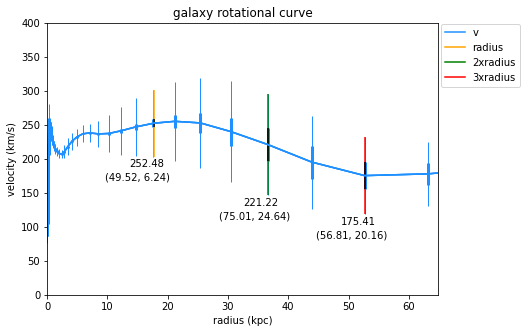

In [411]:
plotGal(mw, mwRds)

Caption:
This plot is a galactic rotation curve for our Milky Way Galaxy. It has it's velocities plotted against the radius up til about three times the radius of the Milky Way Galaxy. As seen in the plot, this curve does not follow the $ v^2 \propto \frac{1}{r} $ proportion based on Newton's equation. 

Under the colored error bars with the corresponding radius, is the velocity at that radius and underneath that value is the uncertainty of velocity, (dv,err), the standard deviation (propagation of the uncertainty in the location of the HII line) and standard error (full error budget).

The thin error bars throughout are the standard deviation uncertainties and the thicker error bars are the standard error uncertainties.

 This data tells us that there is something affecting the galaxy to where the newtonian equations are not accurate. Since as the radius increases, the velocity does not decrease proportionally.

In [412]:
vratios(mw,mwRds,3,err='dv')

Expected drop in velocities ratio according to Newton's law: 1/52.66 = 0.019
Calculated drop in velocities ratio with 'dv' uncertainty: 252.48/175.41 = 1.439 with an uncertainty of ± 56.81
2σ lower limit:  -112.181
2σ upper limit:  115.059
The expected ratio is within 2σ of the calculated ratio


In [413]:
vratios(mw,mwRds,3,err='err')

Expected drop in velocities ratio according to Newton's law: 1/52.66 = 0.019
Calculated drop in velocities ratio with 'err' uncertainty: 252.48/175.41 = 1.439 with an uncertainty of ± 20.16
2σ lower limit:  -38.881
2σ upper limit:  41.759
The expected ratio is within 2σ of the calculated ratio
